# analyse de marée, cas synthétique

On fait l'hypothèse que le signal est la somme d'un bruit et de signaux aux fréquences harmoniques de marée:
$$
\begin{align}
y_i = b_0 + \sum_c \beta_c \cos \big ( \omega_c t_i - \phi_c \big) + e_i
\end{align}
$$
où $c$ désigne le constituent de marée (M2, S2, O1, K1, etc ...), $b_0$ est ...

Les inconnues recherchées sont $\beta_c$ et les $\phi_c$.
On résout le problème grâce une méthode des moindres carrés.
Il faut amener l'équation sous la bonne forme:

$$
\begin{align}
y_i &= b_0 + \sum_c \beta_c \cos \phi_c \cos \omega_c t_i 
+ \beta_c \sin \phi_c \sin \omega_c t_i 
+ e_i \\
&= b_0 + \sum_c a_c \cos \omega_c t_i 
+ b_c \sin \omega_c t_i 
+ e_i 
\end{align}
$$


$$
\begin{align}
y_i &= b_0 + \sum_c \beta_c \cos \phi_c \cos \omega_c t_i 
+ \beta_c \sin \phi_c \sin \omega_c t_i 
+ e_i \\
&= b_0 + \sum_c a_c \cos \omega_c t_i 
+ b_c \sin \omega_c t_i 
+ e_i 
\end{align}
$$

Il s'agit donc maintenant de résoudre le problème matriciel suivant:

$$
\begin{align}
\mathbf{Y} = \mathbf{X} \mathbf{B}
\end{align}
$$

où les matrices $\mathbf{Y},\mathbf{X},\mathbf{B}$ sont données par:
...


La solution minimisant la norme au carré des erreurs est donnée par:
$$
\begin{align}
\mathbf{B} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}' \mathbf{Y}
\end{align}
$$



Documentation:
    
- [xarray](http://xarray.pydata.org/en/stable/index.html)

- [normal distributions](https://en.wikipedia.org/wiki/Normal_distribution)

- recherche sur google

In [1]:
import xarray as xr
import pandas as pd
import numpy as np

from datetime import datetime,timedelta

%matplotlib inline
import matplotlib.pyplot as plt

## génère des données synthétiques

In [2]:
t = pd.date_range('2000-01-01', freq='H', periods=365 * 24)
time = xr.DataArray((t-t[0])/pd.Timedelta('1D'), \
                    dims=['time']).rename('time')
constituents = xr.DataArray(['M2','S2'],dims=['constituents']) #.rename('constituents')
omega = xr.DataArray([1.9322,2.], dims=['constituents'], coords={'constituents': constituents})

# vrais amplitude, phase
beta = (xr.DataArray([1.,.5], dims=['constituents'], 
                    coords={'constituents': constituents})
        .rename('beta'))
phi = (xr.DataArray([0.,0.], dims=['constituents'], 
                  coords={'constituents': constituents}).rename('phi'))

y_tide = beta*np.cos(2.*np.pi*omega*time+phi)

In [3]:
y_tide

<xarray.DataArray (constituents: 2, time: 8760)>
array([[1.000000e+00, 8.747635e-01, 5.304224e-01, ..., 9.974020e-01,
        8.375853e-01, 4.679761e-01],
       [5.000000e-01, 4.330127e-01, 2.500000e-01, ..., 5.666491e-15,
        2.500000e-01, 4.330127e-01]])
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
  * time          (time) float64 0.0 0.04167 0.08333 0.125 ... 364.9 364.9 365.0

### illustration du signal de marée, cycle vive eau/ morte eau

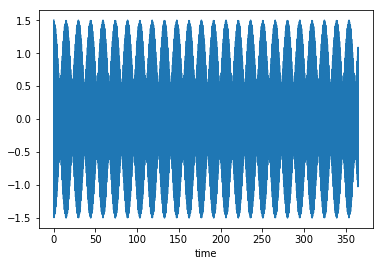

In [4]:
y_tide.sum('constituents').plot()

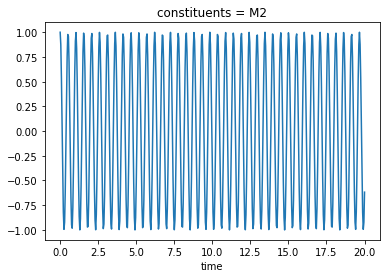

In [5]:
y_tide.sel(time=slice(0,20), constituents='M2').plot()

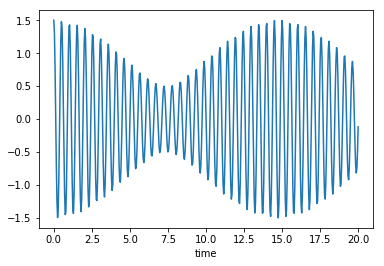

In [6]:
y_tide.sum('constituents').sel(time=slice(0,20)).plot()

## generation du bruit

In [7]:
noise_level = 10.
N_realisations = 100
noise = (xr.DataArray(noise_level*np.random.randn(time.size, N_realisations), 
                      coords={'time':time},
                      dims=['time','realisation'])
        )

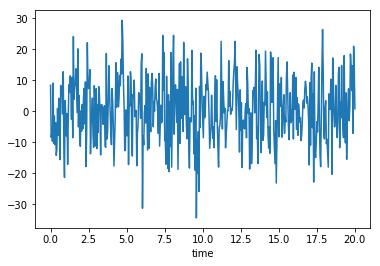

In [8]:
noise.isel(realisation=0).sel(time=slice(0,20)).plot()

In [9]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [10]:
Y = y_tide.sum('constituents') + noise
Y

<xarray.DataArray (time: 8760, realisation: 100)>
array([[  9.886091,  -0.367828,   0.700494, ...,   0.595383,  -2.256999,
        -13.471053],
       [ -7.066658,  -4.65067 ,   2.743453, ...,   0.972854,   3.132917,
        -10.643384],
       [ -6.293402, -11.830221,   2.236459, ...,  16.489976,  -8.77397 ,
          2.524243],
       ...,
       [  0.244855,   0.610577,  -2.242326, ...,  -9.718657,  10.297921,
        -13.264309],
       [  8.45774 ,   0.867106, -15.559302, ...,  20.467364,  -1.105581,
         -4.505187],
       [ -4.393492,   1.112745,   1.359032, ...,   5.90256 ,  -2.888724,
         -8.558447]])
Coordinates:
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 364.9 364.9 365.0
Dimensions without coordinates: realisation

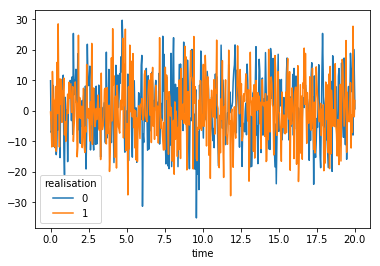

In [11]:
Y.isel(realisation=slice(0,2)).sel(time=slice(0,20)).plot.line(x='time')

In [12]:
X = np.hstack((np.ones((time.size,1)), 
               np.cos(2.*np.pi*omega*time).values.T, 
               np.sin(2.*np.pi*omega*time).values.T))

In [13]:
X

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  8.74763515e-01,  8.66025404e-01,
         4.84550094e-01,  5.00000000e-01],
       [ 1.00000000e+00,  5.30422413e-01,  5.00000000e-01,
         8.47733486e-01,  8.66025404e-01],
       ...,
       [ 1.00000000e+00,  9.97401953e-01,  1.13329815e-14,
         7.20371012e-02, -1.00000000e+00],
       [ 1.00000000e+00,  8.37585254e-01,  5.00000000e-01,
         5.46306638e-01, -8.66025404e-01],
       [ 1.00000000e+00,  4.67976087e-01,  8.66025404e-01,
         8.83741128e-01, -5.00000000e-01]])

In [14]:
X.shape

(8760, 5)

In [15]:
def get_solution(X, Y, constituents):
    B = np.linalg.lstsq(X,Y.values)[0]
    Nc = int((B.shape[0]-1)/2)
    ds = xr.Dataset({'b0': (['realisations'], B[0,:]),
                     'a': (['realisations','constituents'], B[1:Nc+1,:].T),
                     'b': (['realisations','constituents'], B[Nc+1:,:].T)}, 
                     coords={'constituents': constituents})
    return ds

ds = get_solution(X, Y, constituents)
ds

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<xarray.Dataset>
Dimensions:       (constituents: 2, realisations: 100)
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
Dimensions without coordinates: realisations
Data variables:
    b0            (realisations) float64 0.1403 0.06771 ... -0.02066 -0.0003795
    a             (realisations, constituents) float64 1.101 0.5327 ... 0.7243
    b             (realisations, constituents) float64 0.1357 ... -0.000871

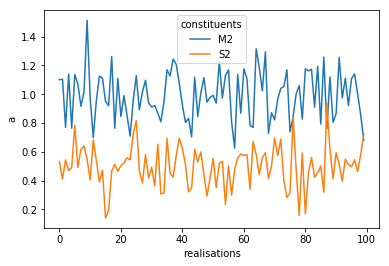

In [16]:
ds.a.plot.line(x='realisations')

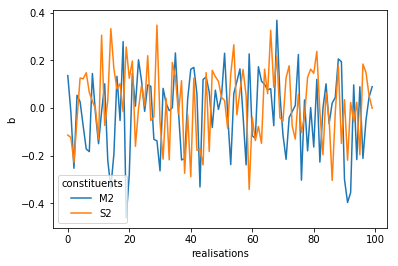

In [17]:
ds.b.plot.line(x='realisations')

---

## de manière plus compact

In [18]:
# generates random times between two time intervals
def pp(start, end, n):
    start_u = start.value//10**9
    end_u = end.value//10**9
    return pd.DatetimeIndex((10**9*np.random.randint(start_u, end_u, n)).view('M8[ns]'))

In [19]:
def solve_pb(amplitudes, noise_level, dt=1/24., T=360, N_realisations=100, 
             constituents=['M2','S2'], omega=[1.9322,2.]):

    #_constituents = xr.DataArray(constituents,dims=['constituents']) #.rename('constituents')
    _omega = xr.DataArray(omega, dims=['constituents'], coords={'constituents': constituents})    
    
    # timle interval
    t_start = datetime(2000, 1, 1)
    t_start = pd.to_datetime('2000-01-01')
    t_end = t_start+timedelta(T)
    # regularly spaced times
    #t = pd.date_range(start=t_start, end=t_end, freq=timedelta(dt))
    # random times
    t = pp(t_start, t_end, int(T/dt))
    time = xr.DataArray((t-t[0])/pd.Timedelta('1D'), \
                        dims=['time']).rename('time')

    # vrais amplitude, phase
    beta = (xr.DataArray(amplitudes, dims=['constituents'], 
                        coords={'constituents': constituents})
            .rename('beta'))
    phi = (xr.DataArray([0. for c in constituents], dims=['constituents'], 
                      coords={'constituents': constituents}).rename('phi'))

    y_tide = beta*np.cos(2.*np.pi*_omega*time+phi)

    noise = (xr.DataArray(noise_level*np.random.randn(time.size, N_realisations), 
                          coords={'time':time},
                          dims=['time','realisation'])
            )

    Y = y_tide.sum('constituents') + noise

    X = np.hstack((np.ones((time.size,1)), 
               np.cos(2.*np.pi*_omega*time).values.T, 
               np.sin(2.*np.pi*_omega*time).values.T))
    
    ds = get_solution(X, Y, constituents)
    ds.attrs['dt'] = dt
    ds.attrs['T'] = T

    return ds

In [20]:
ds = solve_pb([1., .5], .1)
ds

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


<xarray.Dataset>
Dimensions:       (constituents: 2, realisations: 100)
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'
Dimensions without coordinates: realisations
Data variables:
    b0            (realisations) float64 -0.0004381 0.0004241 ... 0.000265
    a             (realisations, constituents) float64 0.9993 0.4996 ... 0.4997
    b             (realisations, constituents) float64 0.001178 ... 0.003057
Attributes:
    dt:       0.041666666666666664
    T:        360

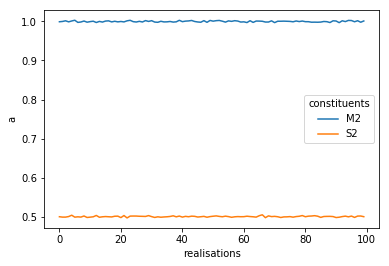

In [21]:
ds.a.plot.line(x='realisations')

# Que calcule-t-on avec les lignes suivantes?

In [22]:
ds.a.mean('realisations')

<xarray.DataArray 'a' (constituents: 2)>
array([1.000019, 0.500024])
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'

In [23]:
ds.a.std('realisations')

<xarray.DataArray 'a' (constituents: 2)>
array([0.001577, 0.001441])
Coordinates:
  * constituents  (constituents) <U2 'M2' 'S2'

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


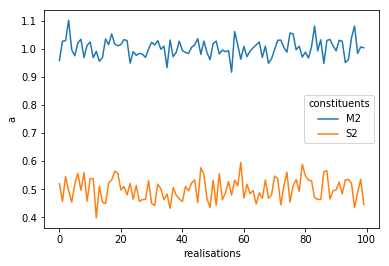

In [24]:
ds = solve_pb([1., .5], .1, dt=20.1)
ds.a.plot.line(x='realisations')

# quelles sont les lois reliant l'erreur sur l'estimation des amplitudes et 1/ le nombre de points utilisés pour dans l'analyse harmonique et 2/ l'amplitude du bruit?

In [36]:
# temporal window = number of points
D={}
T = np.arange(10.,1000.,10.)
for t in T:
    D[t] = solve_pb([1.], .1, T=t, dt=1., N_realisations=1000, constituents=['M2'], omega=[1.9322])    
dsa = xr.concat(list(D.values()), pd.Series(T).rename('T'))
dsa = dsa.assign_coords(N=dsa.T/dsa.dt)

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


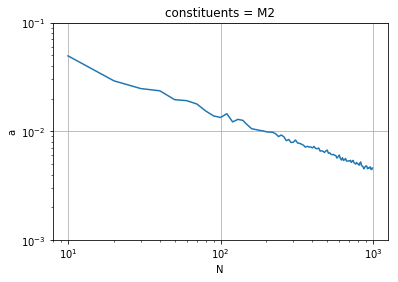

In [37]:
dsa.std('realisations').a.sel(constituents='M2').plot.line(x='N', xscale='log', yscale='log')
plt.ylim((.001,.1))
plt.grid()

In [ ]:
# temporal window = number of points
D={}
T = np.arange(10.,1000.,10.)
for t in T:
    D[t] = solve_pb([1.], .1, T=t, dt=1., N_realisations=1000, constituents=['M2'], omega=[1.9322])    
dsa = xr.concat(list(D.values()), pd.Series(T).rename('T'))
dsa = dsa.assign_coords(N=dsa.T/dsa.dt)

In [32]:
# noise amplitude
D={}
E = 10**np.arange(-1,1.1,.1)
for e in E:
    D[e] = solve_pb([1.], e, T=100., dt=1., N_realisations=1000, 
                    constituents=['M2'], omega=[1.9322])    
dsa = xr.concat(list(D.values()), pd.Series(E).rename('noise_amplitude'))

/Users/aponte/.miniconda3/envs/cognac/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


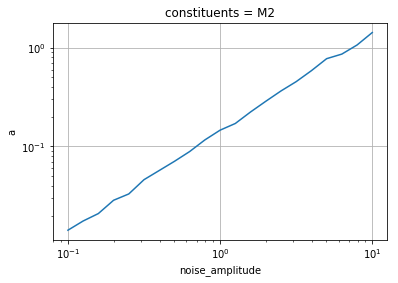

In [33]:
dsa.std('realisations').a.sel(constituents='M2').plot.line(x='noise_amplitude', xscale='log', yscale='log')
plt.grid()